In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import os
import scanpy as sc
from statsmodels.stats.multitest import multipletests
import sys
sys.path.append("../src")
from evaluation_metrics import *
from utils_evaluation import *

In [3]:
from statsmodels.stats.multitest import multipletests

In [4]:
f = np.vectorize(round_sig)

In [5]:
bm_results_dfs, mon_df, melted_mon = get_mon_df()
ssnr_results_dfs, ssnr_df, melted_ssnr = get_ssnr_df(bm_results_dfs)
var_results_dfs, var_df, melted_var = get_sv_df()

mcfarland_2 deseq2_200
mcfarland_2 edgeR_200
mcfarland_4 deseq2_200
mcfarland_4 edgeR_200
mcfarland_5 deseq2_200
mcfarland_5 edgeR_200
bhattacherjee_Astro deseq2_200
bhattacherjee_Astro edgeR_200


/data/bionets/je30bery/rosenbaum_test/notebooks/../src/utils_evaluation.py:172: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xm_results_dfs_var[dataset].replace({"split_10": 10, "split_30": 30, "split_50": 50}, inplace=True)
/data/bionets/je30bery/rosenbaum_test/notebooks/../src/utils_evaluation.py:172: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xm_results_dfs_var[dataset].replace({"split_10": 10, "split_30": 30, "split_50": 50}, inplace=True)
/data/bionets/je30bery/rosenbaum_test/notebooks/../src/utils_evaluation.py:172: Futu

In [6]:
ssnr_results_df = ssnr_results_dfs[['augur', 'wilcoxon', 'deseq2_100', 'edgeR_100', 'scXMatch']].dropna()

In [7]:
FPR = np.sum(-ssnr_results_dfs["scXMatch"] <= 0.05) / len(ssnr_results_dfs)
FPR

0.01282051282051282

In [8]:
FPR_adj = 0
total_len = 0
for dataset in melted_ssnr["dataset"].unique():
    for group in ssnr_results_dfs.loc[dataset].reset_index()["test_group"].unique():
        p_vals = - ssnr_results_dfs.loc[(dataset, group)]["scXMatch"].values
        adj_pvals = multipletests(p_vals, method="fdr_bh")[1]
        ssnr_results_dfs.loc[(dataset, group), "scXMatch adj."] = adj_pvals
        FPR_adj += np.sum(adj_pvals < 0.05)
        total_len += len(adj_pvals)
print(FPR_adj / total_len)

/tmp/ipykernel_3695098/2938770376.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  p_vals = - ssnr_results_dfs.loc[(dataset, group)]["scXMatch"].values
/tmp/ipykernel_3695098/2938770376.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  ssnr_results_dfs.loc[(dataset, group), "scXMatch adj."] = adj_pvals
/tmp/ipykernel_3695098/2938770376.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  p_vals = - ssnr_results_dfs.loc[(dataset, group)]["scXMatch"].values
/tmp/ipykernel_3695098/2938770376.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  ssnr_results_dfs.loc[(dataset, group), "scXMatch adj."] = adj_pvals
/tmp/ipykernel_3695098/2938770376.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  p_vals = - ssnr_results_dfs.loc[(dataset, group)]["scXMatch"].values
/tmp/ipykernel_3695098/2938770376.py:7: PerformanceWarning: indexing past lexsort depth

0.0


/tmp/ipykernel_3695098/2938770376.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  ssnr_results_dfs.loc[(dataset, group), "scXMatch adj."] = adj_pvals
/tmp/ipykernel_3695098/2938770376.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  p_vals = - ssnr_results_dfs.loc[(dataset, group)]["scXMatch"].values
/tmp/ipykernel_3695098/2938770376.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  ssnr_results_dfs.loc[(dataset, group), "scXMatch adj."] = adj_pvals
/tmp/ipykernel_3695098/2938770376.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  p_vals = - ssnr_results_dfs.loc[(dataset, group)]["scXMatch"].values
/tmp/ipykernel_3695098/2938770376.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  ssnr_results_dfs.loc[(dataset, group), "scXMatch adj."] = adj_pvals
/tmp/ipykernel_3695098/2938770376.py:5: PerformanceWarning: indexing past lexsort depth 

In [9]:
pd.concat(bm_results_dfs).to_csv("MI_single_runs.csv")
ssnr_results_dfs.to_csv("SSNR_single_runs.csv")
var_results_dfs.to_csv("SV_single_runs.csv")

In [10]:
f = np.vectorize(round_sig)

In [11]:
mon_df.apply(f).sort_index().sort_index(axis=1).to_csv("MI.csv")
ssnr_df.set_index("metric").apply(f).sort_index().sort_index(axis=1).to_csv("SSNR.csv")
var_df.dropna(axis=0).apply(f).sort_index().sort_index(axis=1).to_csv("SV.csv")

In [12]:
pareto_counts, pareto_sets = compute_pareto_optimal_datasets(
    mon_df.apply(f).sort_index().sort_index(axis=1), 
    ssnr_df.set_index("metric").apply(f).sort_index().sort_index(axis=1), 
    var_df.dropna(axis=0).apply(f).sort_index().sort_index(axis=1))

samples = set()
for sample_list in pareto_sets.values():
    samples.update(sample_list)
heatmap_data = {method: [sample in sample_list for sample in samples] 
                for method, sample_list in pareto_sets.items()}
df = pd.DataFrame(heatmap_data, index=list(samples)).T

In [13]:
pareto_counts.rename({"deseq2_100": '#DEGs DESeq$2_{100}$', 
               "edgeR_100": '#DEGs edgeR$_{100}$',
              "augur": "Augur",
                "wilcoxon": '#DEGs Wilcoxon',
               "scXMatch": '$\\mathbf{scXMatch}$',
               }, inplace=True, axis=0)

In [14]:
melted_mon = melted_mon.sort_values("dataset")
melted_ssnr = melted_ssnr.sort_values("dataset")
melted_var = melted_var.sort_values("dataset")

In [15]:
palette = sns.color_palette("viridis", 4) + sns.color_palette("magma", 1)
palette_dict = {           
    'Augur': palette[0],
    '#DEGs Wilcoxon': palette[1],
    '#DEGs DESeq$2_{100}$': palette[2],
    '#DEGs edgeR$_{100}$': palette[3],
    '$\\mathbf{scXMatch}$': palette[4]}

/tmp/ipykernel_3695098/3810704931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pareto_counts, palette=palette_dict, ax=axs[0], orient="h", order=palette_dict.keys(), edgecolor="0.1", width=0.3)


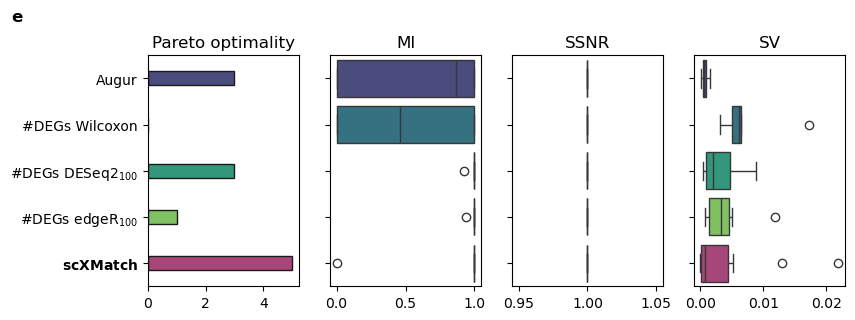

In [16]:
f, axs = plt.subplots(1, 4, figsize=(9, 3), sharey=True)


sns.barplot(pareto_counts, palette=palette_dict, ax=axs[0], orient="h", order=palette_dict.keys(), edgecolor="0.1", width=0.3)
axs[0].set_title("Pareto optimality")

sns.boxplot(melted_mon, x="value", orient="h", y="metric", palette=palette_dict, ax=axs[1], legend=False,  hue="metric", hue_order=palette_dict.keys(), order=palette_dict.keys())
axs[1].set_title("MI")
axs[1].set_ylabel("")
axs[1].set_xlabel("")

sns.boxplot(melted_ssnr, x="value", orient="h", y="metric", palette=palette_dict, ax=axs[2], legend=False,  hue="metric", hue_order=palette_dict.keys(), order=palette_dict.keys())
axs[2].set_title("SSNR")
axs[2].set_ylabel("")
axs[2].set_xlabel("")

sns.boxplot(melted_var, x="value", orient="h", y="metric", palette=palette_dict, ax=axs[3], legend=False,  hue="metric", hue_order=palette_dict.keys(), order=palette_dict.keys())
axs[3].set_title("SV")
axs[3].set_ylabel("")
axs[3].set_xlabel("")

axs[0].text(
    -0.9, 1.2,  # Position (normalized figure coordinates)
    "e",   # Corresponding letter
    transform=axs[0].transAxes,  # Relative to subplot
    fontsize=12, va='top', ha='left', fontweight='bold'
)

#axs[0].set_yticklabels(["McFarland", "Norman", "Schiebinger", "Srivatsan A549", "Srivatsan K562", "Srivatsan MCF7"])
plt.savefig("../plots/fig3/fig3e.svg", bbox_inches="tight")

/tmp/ipykernel_3695098/622187181.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(["Bhattacherjee 1", "Bhattacherjee 2", "Bhattacherjee 3", "McFarland 1", "McFarland 2", "McFarland 3", "McFarland 4", "McFarland 5", "Norman", "Schiebinger"])


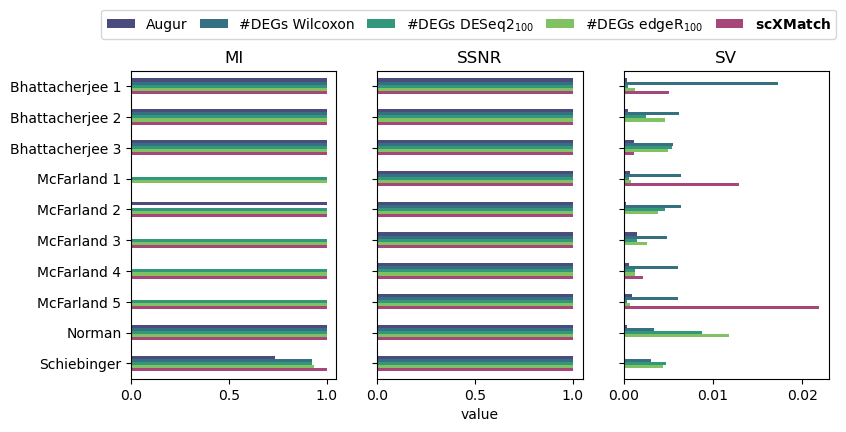

In [17]:
f, axs = plt.subplots(1, 3, figsize=(9, 4))


sns.barplot(melted_mon, y="dataset", hue="metric", x="value", orient="h", palette=palette_dict, ax=axs[0], legend=True, width=0.5, hue_order=palette_dict.keys())
axs[0].set_title("MI")
axs[0].set_ylabel("")
axs[0].set_xlabel("")
#axs[0].set_yticklabels([])

sns.barplot(melted_ssnr, y="dataset", hue="metric", x="value", orient="h", palette=palette_dict, ax=axs[1], legend=False, width=0.5, hue_order=palette_dict.keys())
axs[1].set_title("SSNR")
axs[1].set_ylabel("")
axs[1].set_yticklabels([])

sns.barplot(melted_var, y="dataset", hue="metric", x="value", orient="h", palette=palette_dict, ax=axs[2], legend=False, width=0.5, hue_order=palette_dict.keys())
axs[2].set_title("SV")
axs[2].set_ylabel("")
axs[2].set_xlabel("")
axs[2].set_yticklabels([])

handles, labels = axs[0].get_legend_handles_labels()
f.legend(handles, labels, loc='upper center', ncol=len(palette), bbox_to_anchor=(0.5, 1.05), columnspacing=0.9)
axs[0].legend_.remove()


axs[0].set_yticklabels(["Bhattacherjee 1", "Bhattacherjee 2", "Bhattacherjee 3", "McFarland 1", "McFarland 2", "McFarland 3", "McFarland 4", "McFarland 5", "Norman", "Schiebinger"])
plt.savefig("../plots/fig3/fig3_additional.pdf", bbox_inches="tight")